# Parametric vs. Non-parametric

Parametric and non-parametric approaches for statistical tests and distribution estimation are discussed in the following.

## Parametric and Non-parameric tests

Assume a test comparing two groups for their quantitative feature.

When they are from normal distributions, the test of choice is t-test that is based on the assumption that the populations distribute normally. Normal distributions are fully described with parameters, mean and sd. Therefore, the test treats the data set and estimates the parameter values, based on which p-value is calculated.

On the other hand, when the populations' distributions are not well parameterized, it is known that parametric test methods are not appropriate and non-parametric tests should be used, such as Wilcoxon rank-order test (Mann-Whitney test).

Four experimets follow.

+ Two sample sets are from the same normal distribution.
+ Two sample sets are from different normal distributions.
+ Two sample sets are from the same but non-normal distribution.
+ Two sample sets are from different and non-normal distribution.


### Assignment 課題

Interpret the two plots of each experiment.s

ERROR: Error in c(1, 1, ):  引数 3 が空です 


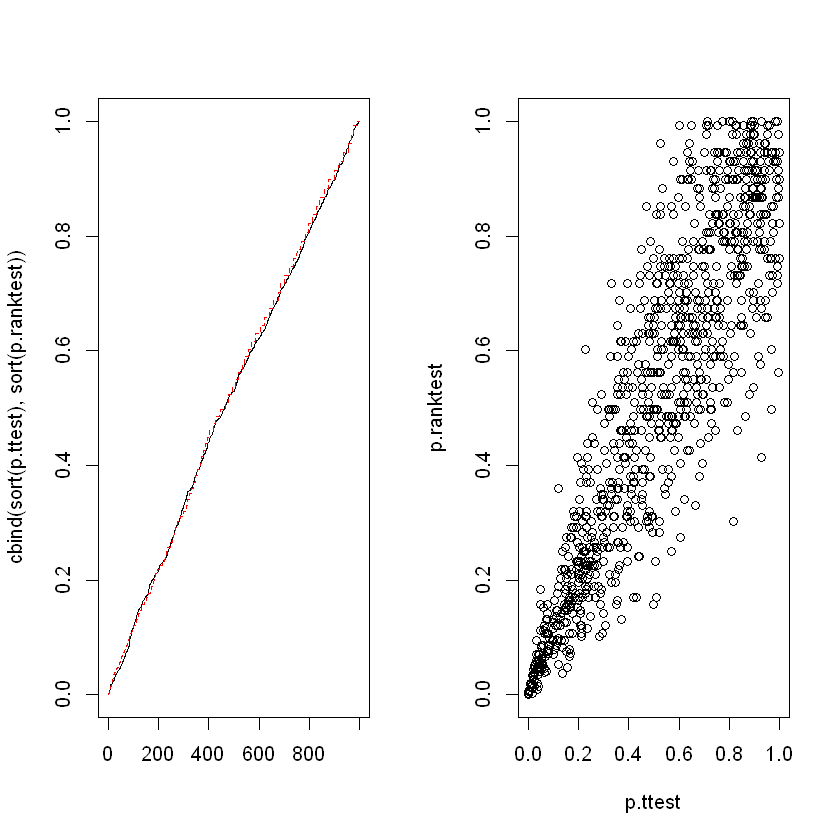

In [29]:
# Two sample sets are from the same normal distribution.

n1 <- 20
n2 <- 30
p.ttest <- p.ranktest <- rep(0,n.iter)
for(i in 1:n.iter){
    x1 <- rnorm(n1)
    x2 <- rnorm(n2)
    tmp1 <- t.test(x1,x2)
    p.ttest[i] <- tmp1$p.value
    tmp2 <- wilcox.test(x1,x2)
    p.ranktest[i] <- tmp2$p.value
}
par(mfcol=c(1,2))
matplot(cbind(sort(p.ttest),sort(p.ranktest)),type="l")
plot(p.ttest,p.ranktest)
par(mfcol=c(1,1,))
mean(p.ttest)
mean(p.ranktest)

[1] 0.3486205

[1] 0.3604967

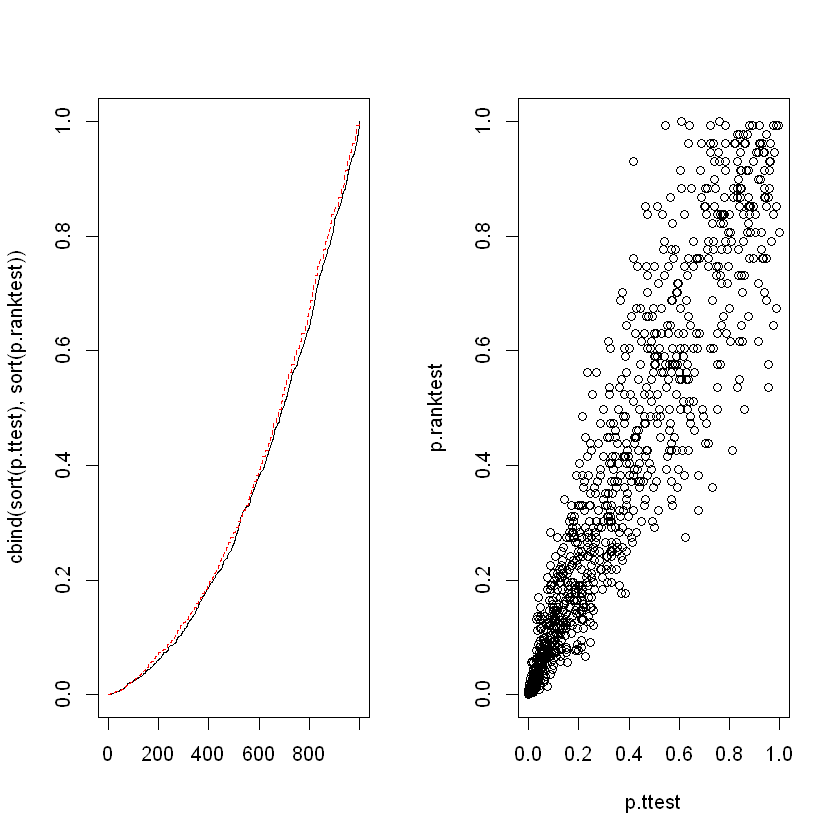

In [30]:
# Two sample sets are from different normal distributions.

n.iter <- 1000
n1 <- 20
n2 <- 30
p.ttest <- p.ranktest <- rep(0,n.iter)
for(i in 1:n.iter){
    x1 <- rnorm(n1)
    x2 <- rnorm(n2,0.3)
    tmp1 <- t.test(x1,x2)
    p.ttest[i] <- tmp1$p.value
    tmp2 <- wilcox.test(x1,x2)
    p.ranktest[i] <- tmp2$p.value
}
par(mfcol=c(1,2))
matplot(cbind(sort(p.ttest),sort(p.ranktest)),type="l")
plot(p.ttest,p.ranktest)
par(mfcol=c(1,1))
mean(p.ttest)
mean(p.ranktest)

[1] 0.4955766

[1] 0.4899062

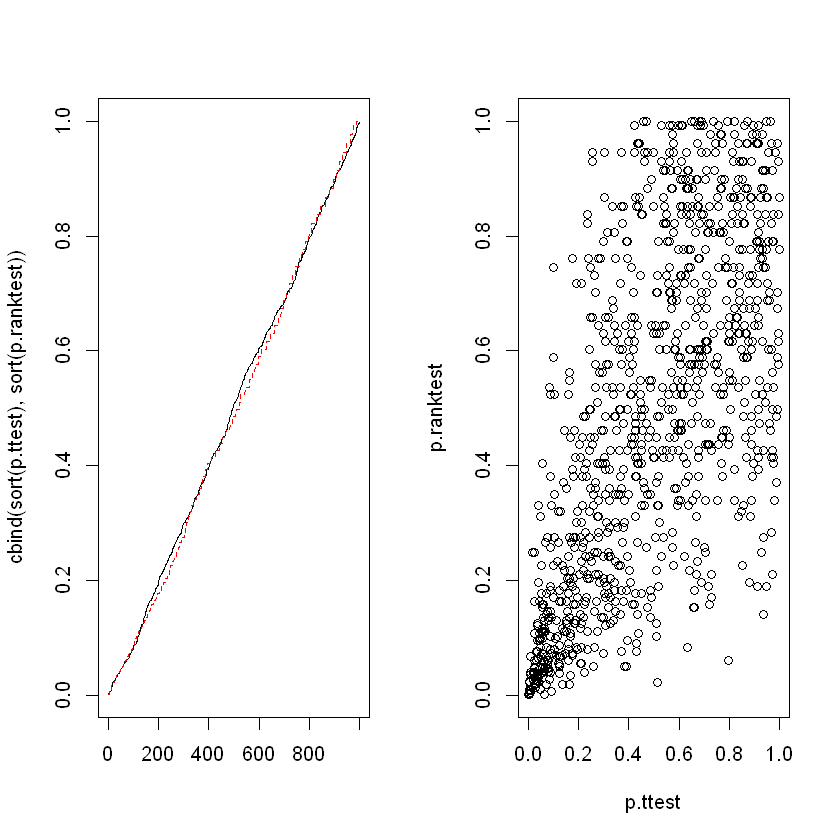

In [31]:
# Two sample sets are from the same but non-normal distribution.


n.iter <- 1000
n1 <- 20
n2 <- 30
p.ttest <- p.ranktest <- rep(0,n.iter)
for(i in 1:n.iter){
    x1 <- rexp(n1)
    x2 <- rexp(n2)
    tmp1 <- t.test(x1,x2)
    p.ttest[i] <- tmp1$p.value
    tmp2 <- wilcox.test(x1,x2)
    p.ranktest[i] <- tmp2$p.value
}
par(mfcol=c(1,2))
matplot(cbind(sort(p.ttest),sort(p.ranktest)),type="l")
plot(p.ttest,p.ranktest)
par(mfcol=c(1,1))
mean(p.ttest)
mean(p.ranktest)

[1] 0.5073499

[1] 0.5286747

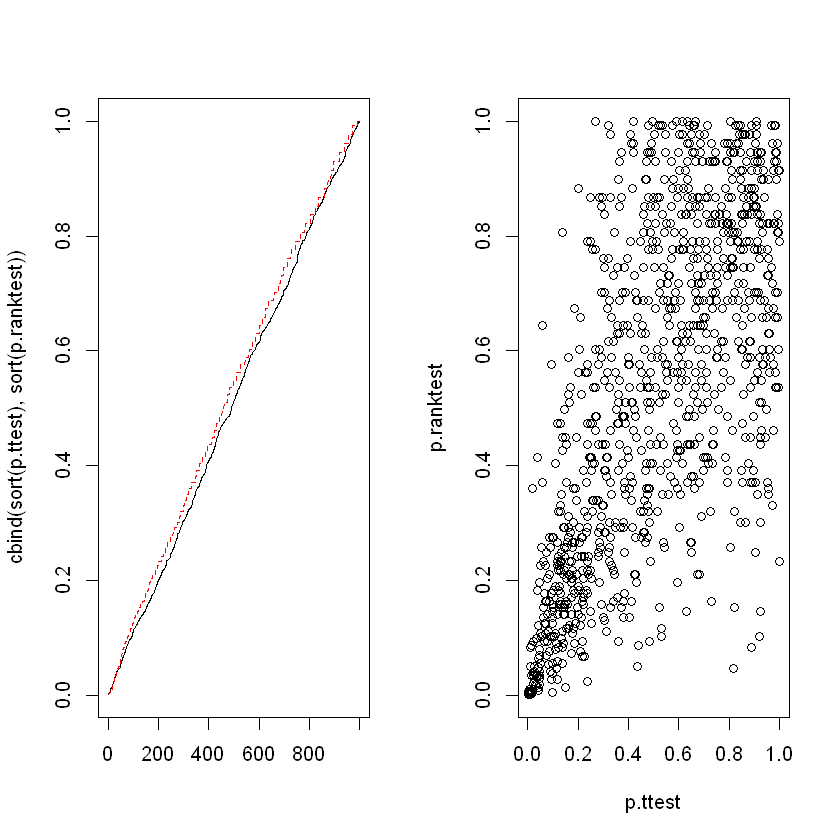

In [32]:
# Two sample sets are from different and non-normal distribution.

n.iter <- 1000
n1 <- 20
n2 <- 30
p.ttest <- p.ranktest <- rep(0,n.iter)
for(i in 1:n.iter){
    x1 <- rexp(n1)
    x2 <- rexp(n2)+0.
    tmp1 <- t.test(x1,x2)
    p.ttest[i] <- tmp1$p.value
    tmp2 <- wilcox.test(x1,x2)
    p.ranktest[i] <- tmp2$p.value
}
par(mfcol=c(1,2))
matplot(cbind(sort(p.ttest),sort(p.ranktest)),type="l")
plot(p.ttest,p.ranktest)
par(mfcol=c(1,1))
mean(p.ttest)
mean(p.ranktest)

## Parametric and Non-parametric Estimation of Distribution

Consider a task to estimate a distribution function. See [Examples of Learning](./Examples_of_Learning.ipynb).


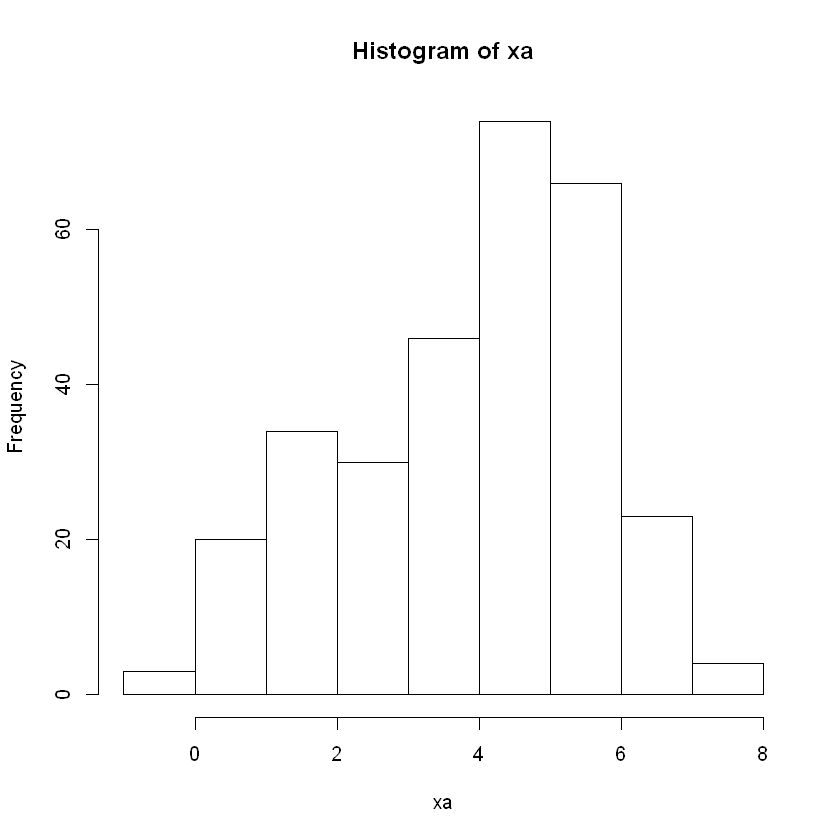

In [25]:
na1 <- 100
na2 <- 200
xa <- c(rnorm(na1,2,1),rnorm(na2,5,1))
hist(xa)

### Parametric

Assume a normal distribution and find an appropriate mean and sd values for samples.

[1] 3.935041

[1] 1.761208

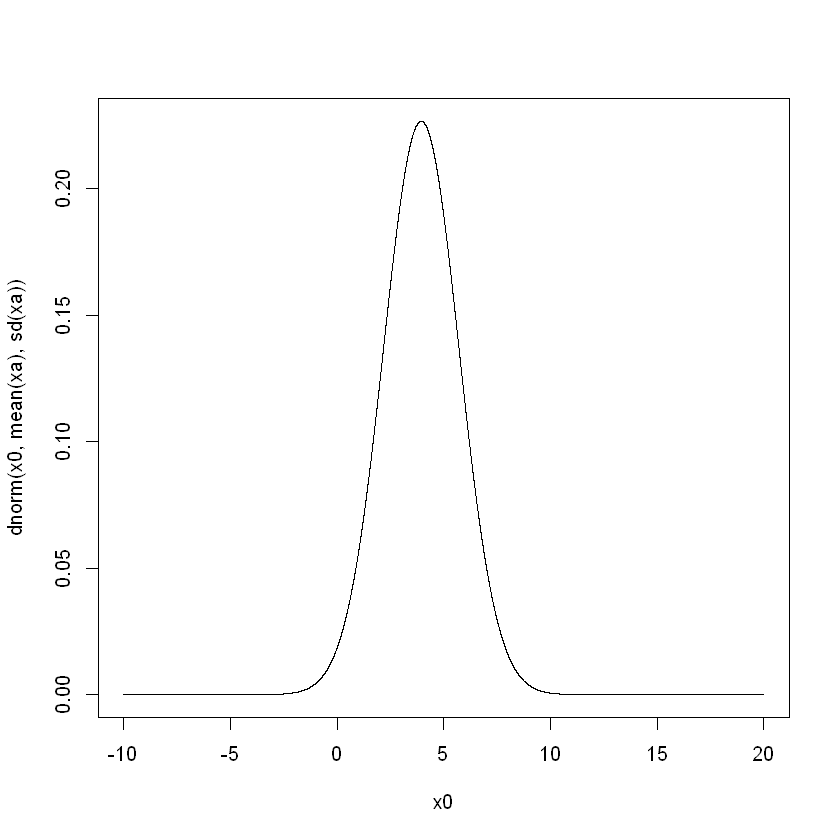

In [26]:
mean(xa)
sd(xa)
x0 <- seq(from=-10,to=20,length=10000)
plot(x0,dnorm(x0,mean(xa),sd(xa)),type="l")

### Non-parametric

No use of distributions that are characterized with parameters.

Instead, density at arbitrary locations are estimated locally.

In the following case, estimation of density is based on the local segments, whose interval is parameterized by an argument "adjust" of density() function.



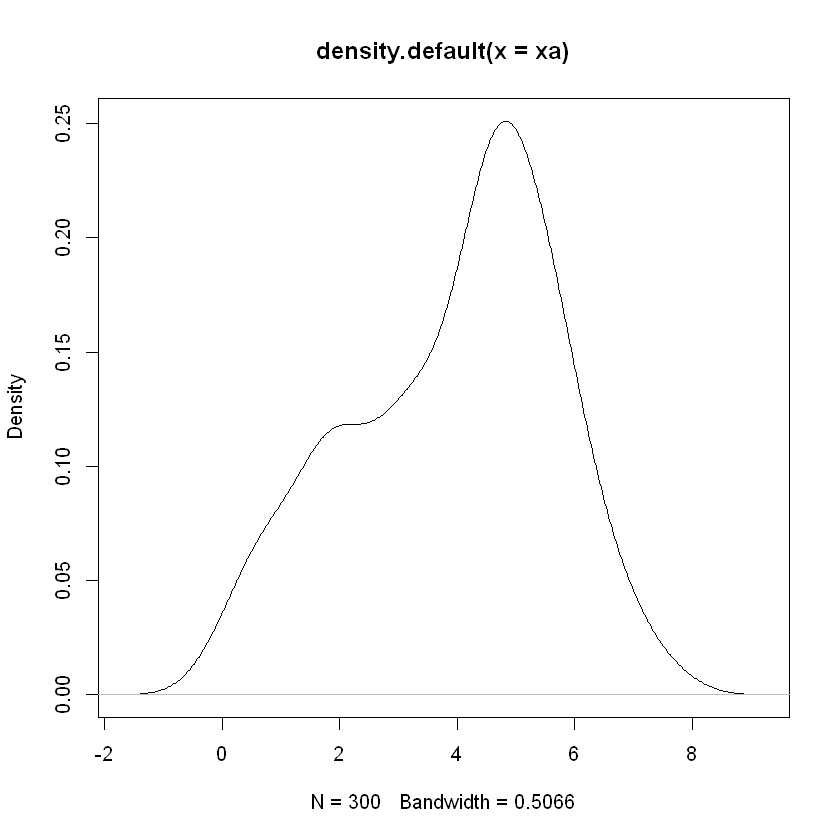

In [27]:
y <- density(xa)
plot(y)

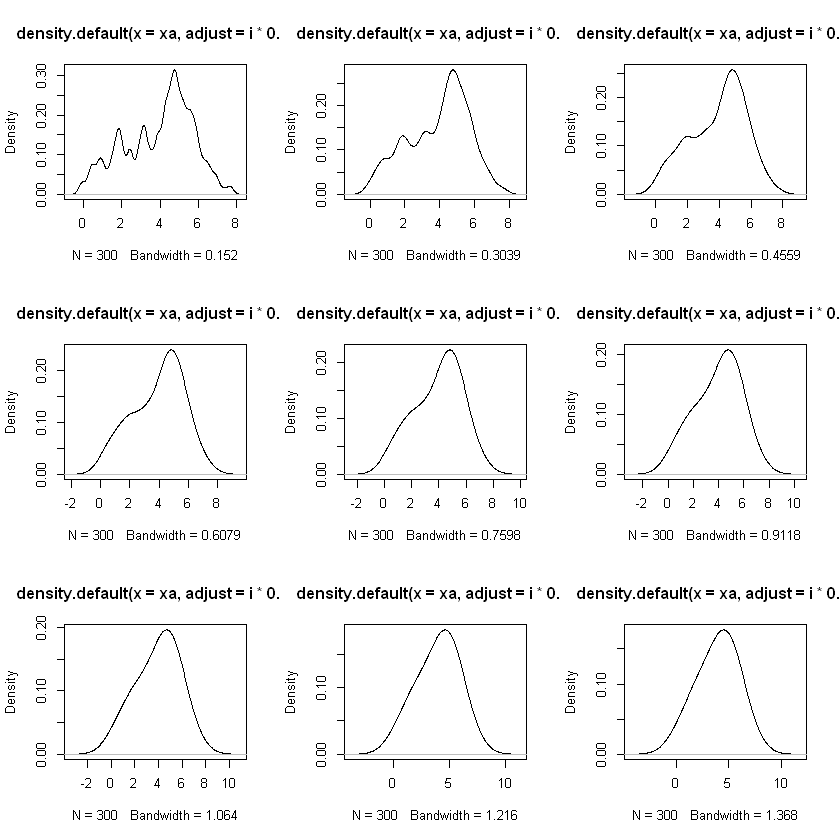

In [28]:
par(mfrow=c(3,3))
adj <- 2^(seq(from=-10,to=10,length=9))
for(i in 1:9){
    tmp <- density(xa,adjust=i*0.3)
    plot(tmp)
}
par(mfcol=c(1,1))

#### Further idea: Non-parametric Bayesian approach and infinite-dimensional models.

Along with the increase in sample size, the complexity of estimated distribution can be increased. 
In other words, the number of parameters to express the distribution can increase upto the sample size.

Therefore, the number of parameters can go to infinity, which is why non-parametric Bayesian approach is called infinite-dimensional models. 

[Nonparametric Bayes Tutorial](http://www.tamarabroderick.com/tutorial_2017_mitll.html) 